# Lab 1 Analysis Example using Thicket

In [85]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [86]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sort3/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [87]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              96387453       154.066625   
                                                  125094042        1.445946   
                                                  136462064      234.480665   
                                                  224262369        0.032633   
                                                  226423909        9.534232   
                                                  236817265        3.307307   
                                                  254330487        0.249134   
                                                  267055606        0.239427   
                                                  328894138      307.990501   
                                                  366907904        1.398068   
                                                  369740256        9.755237   
                                                  478579561        3.327772   
                                                  485392475       10.151916   
                                                  491488988        0.308123   
                                                  498735902        2.499915   
                                                  512550339        0.099422   
                                                  515405417        3.434870   
                                                  534472231        1.486794   
                                                  561425512        1.363670   
                                                  577358404      549.972965   
                                                  591006971        8.675781   
                                                  602430384        0.031419   
                                                  689404126        1.158580   
                                                  791874404       34.263462   
                                                  866384639     2470.648388   
                                                  914308246        8.305610   
                                                  939046943        1.644635   
                                                  1058089730       0.526261   
                                                  1063817247       3.213429   
                                                  1112895243      15.578890   
                                                  1125817381       0.024919   
                                                  1127408257       0.375679   
                                                  1132568813       1.064485   
                                                  1178857823       0.297484   
                                                  1208028574       8.415977   
                                                  1219508416       0.283778   
                                                  1229844398       2.431903   
                                                  1233138883       1.212754   
                                                  1235336969      47.499575   
                                                  1244749383       0.979660   
                                                  1252107835       0.026174   
                                                  1255156828       0.587640   
                                                  1277230400       4.750606   
                                                  1285908972      19.089650   
                                                  1334413436       0.035719   
                                                  1342788810       0.700575   
                                                  1354911456       3.233499   
                                                  1360757312      26.832836   
                                                  1415354612      14.136684   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [88]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  ├─ 1.000 MPI_Scatter
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     ├─ 1.000 MPI_Gather
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [89]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
96387453             2.11.0-dev               8   
125094042            2.11.0-dev              64   
136462064            2.11.0-dev            1024   
224262369            2.11.0-dev               8   
226423909            2.11.0-dev               8   
236817265            2.11.0-dev             256   
254330487            2.11.0-dev               8   
267055606            2.11.0-dev              64   
328894138            2.11.0-dev            1024   
366907904            2.11.0-dev              32   
369740256            2.11.0-dev             512   
478579561            2.11.0-dev             256   
485392475            2.11.0-dev             512   
491488988            2.11.0-dev               2   
498735902            2.11.0-dev             128   
512550339            2.11.0-dev              32   
515405417            2.11.0-dev             128   
534472231            2.11.0-dev              32   
561425512            2.11.0-dev              32   
577358404            2.11.0-dev             256   
591006971            2.11.0-dev             512   
602430384            2.11.0-dev              32   
689404126            2.11.0-dev              16   
791874404            2.11.0-dev             512   
866384639            2.11.0-dev               8   
914308246            2.11.0-dev             512   
939046943            2.11.0-dev             128   
1058089730           2.11.0-dev               8   
1063817247           2.11.0-dev              64   
1112895243           2.11.0-dev             256   
1125817381           2.11.0-dev               2   
1127408257           2.11.0-dev               4   
1132568813           2.11.0-dev             512   
1178857823           2.11.0-dev              32   
1208028574           2.11.0-dev             256   
1219508416           2.11.0-dev               2   
1229844398           2.11.0-dev             128   
1233138883           2.11.0-dev              32   
1235336969           2.11.0-dev             512   
1244749383           2.11.0-dev               8   
1252107835           2.11.0-dev              16   
1255156828           2.11.0-dev              64   
1277230400           2.11.0-dev             256   
1285908972           2.11.0-dev             512   
1334413436           2.11.0-dev              32   
1342788810           2.11.0-dev               4   
1354911456           2.11.0-dev             256   
1360757312           2.11.0-dev            1024   
1415354612           2.11.0-dev             512   
1452988688           2.11.0-dev               4   
1467409442           2.11.0-dev             128   
1510749833           2.11.0-dev               4   
1514005273           2.11.0-dev              64   
1552742471           2.11.0-dev               8   
1571739899           2.11.0-dev             512   
1594575338           2.11.0-dev             256   
1618502310           2.11.0-dev               2   
1646947451           2.11.0-dev              64   
1688383690           2.11.0-dev               4   
1701506829           2.11.0-dev            1024   
1790927496           2.11.0-dev              64   
1798249285           2.11.0-dev             256   
1844985577           2.11.0-dev              32   
1850520422           2.11.0-dev             256   
1898457644           2.11.0-dev              32   
1925583792           2.11.0-dev               8   
1930022590           2.11.0-dev             256   
1941721610           2.11.0-dev              32   
1946102318           2.11.0-dev               4   
1946591664           2.11.0-dev               2   
1947014976           2.11.0-dev              16   
1963726364           2.11.0-dev               4   
1963771600           2.11.0-dev              16   
1993344714           2.11.0-dev            1024   
2071331326           2.11.0-dev             128   
2200548846           2.11.0-dev            1024   
2202992537           2.11.0-dev  

In [90]:
gb = tk.groupby("num_procs")
print(gb.keys())
allthickets = list(gb.values())
input2 = gb[2].groupby("Algorithm")
input4 = gb[4].groupby("Algorithm")
input8 = gb[8].groupby("Algorithm")
input16 = gb[16].groupby("Algorithm")
input32 = gb[32].groupby("Algorithm")
input64 = gb[64].groupby("Algorithm")
input128 = gb[128].groupby("Algorithm")
input256 = gb[256].groupby("Algorithm")
input512 = gb[512].groupby("Algorithm")
input1024 = gb[1024].groupby("Algorithm")


10  thickets created...
{2: <thicket.thicket.Thicket object at 0x2b2f2cbd51f0>, 4: <thicket.thicket.Thicket object at 0x2b2f2c04a3d0>, 8: <thicket.thicket.Thicket object at 0x2b2f2ae33370>, 16: <thicket.thicket.Thicket object at 0x2b2f2bb49550>, 32: <thicket.thicket.Thicket object at 0x2b2f2af80d60>, 64: <thicket.thicket.Thicket object at 0x2b2f2b67b5e0>, 128: <thicket.thicket.Thicket object at 0x2b2f2f1110d0>, 256: <thicket.thicket.Thicket object at 0x2b2f2c1719d0>, 512: <thicket.thicket.Thicket object at 0x2b2f2c171880>, 1024: <thicket.thicket.Thicket object at 0x2b2f2bb5d640>}
dict_keys([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b2f2b7576a0>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b2f2b3fe250>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2b2f2c508d60>}
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b2f2c2f4460>, 'MergeSort': <thicket.thi

Compose these 3 groups column-wise to get a holistic view of the data

In [91]:
ctk2 = th.Thicket.concat_thickets(
    thickets=list(input2.values()),
    headers=list(input2.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk4 = th.Thicket.concat_thickets(
    thickets=list(input4.values()),
    headers=list(input4.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk8 = th.Thicket.concat_thickets(
    thickets=list(input8.values()),
    headers=list(input8.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk16 = th.Thicket.concat_thickets(
    thickets=list(input16.values()),
    headers=list(input16.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk32 = th.Thicket.concat_thickets(
    thickets=list(input32.values()),
    headers=list(input32.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk64 = th.Thicket.concat_thickets(
    thickets=list(input64.values()),
    headers=list(input64.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk128 = th.Thicket.concat_thickets(
    thickets=list(input128.values()),
    headers=list(input128.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk256 = th.Thicket.concat_thickets(
    thickets=list(input256.values()),
    headers=list(input256.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk512 = th.Thicket.concat_thickets(
    thickets=list(input512.values()),
    headers=list(input512.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk1024 = th.Thicket.concat_thickets(
    thickets=list(input1024.values()),
    headers=list(input1024.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctk2)
allctk.append(ctk4)
allctk.append(ctk8)
allctk.append(ctk16)
allctk.append(ctk32)
allctk.append(ctk64)
allctk.append(ctk128)
allctk.append(ctk256)
allctk.append(ctk512)
allctk.append(ctk1024)

In [92]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                 17.693142   
                                                  262144               284.700548   
                                                  1048576             4568.022432   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  0.000533   
                                                  262144                 0.319780   
                                                  1048576                0.050871   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.000508   
                                                  262144                 0.319753   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                 10.045303   
                                                  262144               161.824413   
                                                  1048576             2594.477296   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  3.066985   
                                                  262144                48.764503   
                                                  1048576              782.993338   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  3.066941   
                                                  262144                48.764459   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  9.534232   
                                                  262144               154.066625   
                                                  1048576             2470.648388   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  4.396485   
                                                  262144                69.679716   
                                                  1048576             1116.117673   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  4.396382   
                                                  262144                69.679606   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  2.296861   
                                                  262144                36.943541   
                                                  1048576             2371.954269   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  1.161293   
                                                  262144                18.332249   
                                                  1048576             1172.302359   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  1.161110   
                                                  262144                18.332056   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  1.388426   
                                                  262144                17.956176   
                                                  1048576             2280.544211   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  0.761057   
                                                  262144                 9.836019   
                                                  1048576             1235.821754   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.760689   
                                                  262144                 9.835641   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  1.393031   
                                                  262144                17.667131   
                                                  1048576             2233.832866   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  0.950916   
                                                  262144                10.193523   
                                                  1048576             1269.831924   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.950135   
                                                  262144                10.192781   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  2.431903   
                                                  262144                18.189344   
                                                  1048576              553.628780   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  2.022793   
                                                  262144                11.212183   
                                                  1048576              323.028586   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  2.001313   
                                                  262144                11.210570   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  5.179713   
                                                  262144                20.041720   
                                                  1048576              549.972965   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  5.077810   
                                                  262144                13.473157   
                                                  1048576              326.402191   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  5.074890   
                                                  262144                13.429940   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  1.064485   
                                                  262144                10.151916   
                                                  1048576              267.523447   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  1.032268   
                                                  262144                 8.319371   
                                                  1048576              159.368357   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  1.025444   
                                                  262144                 8.313154   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  3.016097   
                                                  262144                10.181788   
                                                  1048576              250.039462   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  2.945464   
                                                  262144                 9.826293   
                                                  1048576              153.427701   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  2.932068   
                                                  262144                 9.813464   
                                                  1048576        

Perform pandas operations to get the table in a desirable format for plotting

In [93]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [94]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                 17.693142     17.693146     17.693144   
                  262144               284.700548    284.700960    284.700754   
                  1048576             4568.022432   4568.022459   4568.022446   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  0.000533     10.435700      5.218116   
                  262144                 0.319780    167.518832     83.919306   
                  1048576                0.050871   2695.652474   1347.851673   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.000508     10.435681      5.218095   
                  262144                 0.319753    167.518814     83.919284   
                  1048576                0.050825   2695.652455   1347.851640   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                 10.045303     10.063572     10.058983   
                  262144               161.824413    161.825206    161.825005   
                  1048576             2594.477296   2594.482075   2594.479941   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  3.066985      8.235953      4.903700   
                  262144                48.764503    132.522120     78.475538   
                  1048576              782.993338   2125.018725   1258.717225   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  3.066941      8.235930      4.903653   
                  262144                48.764459    132.522092     78.475487   
                  1048576              782.993280   2125.018698   1258.717173   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  9.534232     10.675721     10.105227   
                  262144               154.066625    171.369026    162.714748   
                  1048576             2470.648388   2745.771492   2608.210909   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  4.396485      8.678688      5.553974   
                  262144                69.679716    139.358676     88.804809   
                  1048576             1116.117673   2236.156538   1422.692960   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  4.396382      8.678651      5.553879   
                  262144                69.679606    139.358632     88.804701   
                  1048576             1116.117564   2236.156488   1422.692846   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  2.296861      2.732137      2.481961   
                  262144                36.943541     43.987804     39.812985   
                  1048576             2371.954269   2826.602421   2555.648262   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  1.161293      2.250810      1.452415   
                  262144                18.332249     35.828725     23.107087   
                  1048576             1172.302359   2291.893470   1481.531433   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  1.161110      2.250747      1.452236   
                  262144                18.332056     35.828651     23.106898   
                  1048576             1172.302144   2291.893389   1481.531200   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  1.388426     38.439053     33.671490   
                  262144                17.956176     22.469024     19.700838   
                  1048576             2280.544211   2859.723282   2504.035429   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  0.761057     38.222815     33.187289   
                  262144                 9.836019     18.164483     11.891874   
                  1048576             1235.821754   2314.897440   1501.222914   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.760689     38.222688     33.186931   
                  262144                 9.835641     18.164354     11.891504   
                  1048576             1235.821330   2314.897295   1501.220584   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  1.393031      1.744599      1.542737   
                  262144                17.667131     22.660439     19.496182   
                  1048576             2233.832866   2879.505933   2473.850272   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  0.950916      1.387384      1.115225   
                  262144                10.193523     18.302420     12.090021   
                  1048576             1269.831924   2323.764101   1512.878944   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.950135      1.387136      1.114462   
                  262144                10.192781     18.302161     12.088554   
                  1048576             1269.831026   2323.763817   1512.871613   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  2.431903      2.745113      2.587587   
                  262144                18.189344     23.240371     20.032637   
                  1048576              553.628780    720.572875    614.171590   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  2.022793      2.597575      2.330734   
                  262144                11.212183     19.063063     13.017181   
                  1048576              323.028586    582.847668    379.756441   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  2.001313      2.596141      2.327606   
                  262144                11.210570     19.062557     13.013451   
                  1048576              323.017074    582.847138    379.749662   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  5.179713     41.839397     37.059814   
                  262144                20.041720     25.372559     21.979929   
                  1048576              549.972965    715.987720    609.319659   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  5.077810     41.731301     36.961289   
                  262144                13.473157     20.357558     15.742870   
                  1048576              326.402191    583.153415    380.091505   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  5.074890     41.728302     36.957242   
                  262144                13.429940     20.356554     15.713241   
                  1048576              326.399142    583.152334    380.068824   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  1.064485     37.615704     32.364348   
                  262144                10.151916     13.119965     11.226028   
                  1048576              267.523447    351.675983    297.167854   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  1.032268     37.550586     32.309106   
                  262144                 8.319371     11.887299      9.719339   
                  1048576              159.368357    282.326782    187.059732   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  1.025444     37.536677     32.302082   
                  262144                 8.313154     11.849998      9.690193   
                  1048576              159.301505    282.323991    187.019973   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  3.016097     37.202031     32.279236   
                  262144                10.181788     33.813139     28.924175   
                  1048576              250.039462    325.559785    275.988182   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  2.945464     37.141940     32.216408   
                  262144                 9.826293     33.005481     28.343556   
                  1048576              153.427701    259.734737    181.108279   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  2.932068     37.128227     32.201134   
                  262144                 9.813464     32.992984     28.320845   
                  1048576              153.356937    259.730624    180.810846   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

In [95]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'), ('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())



In [96]:
for ctk in allctk:
    display(ctk.metadata)

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev            2.0   
262144               2.11.0-dev            2.0   
1048576              2.11.0-dev            2.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-2-3-bubble.cali               true   
262144               true   262144-2-3-bubble.cali               true   
1048576              true  1048576-2-3-bubble.cali               true   
4194304               NaN                      NaN                NaN   
16777216              NaN                      NaN                NaN   
67108864              NaN                      NaN                NaN   
268435456             NaN                      NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700072e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               cmdline cl

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev            4.0   
262144               2.11.0-dev            4.0   
1048576              2.11.0-dev            4.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-4-3-bubble.cali               true   
262144               true   262144-4-3-bubble.cali               true   
1048576              true  1048576-4-3-bubble.cali               true   
4194304               NaN                      NaN                NaN   
16777216              NaN                      NaN                NaN   
67108864              NaN                      NaN                NaN   
268435456             NaN                      NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700072e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               cmdline cl

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev            8.0   
262144               2.11.0-dev            8.0   
1048576              2.11.0-dev            8.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-8-3-bubble.cali               true   
262144               true   262144-8-3-bubble.cali               true   
1048576              true  1048576-8-3-bubble.cali               true   
4194304               NaN                      NaN                NaN   
16777216              NaN                      NaN                NaN   
67108864              NaN                      NaN                NaN   
268435456             NaN                      NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700072e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               cmdline cl

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev           16.0   
262144               2.11.0-dev           16.0   
1048576              2.11.0-dev           16.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
InputSize                                                                
65536                true    65536-16-3-bubble.cali               true   
262144               true   262144-16-3-bubble.cali               true   
1048576              true  1048576-16-3-bubble.cali               true   
4194304               NaN                       NaN                NaN   
16777216              NaN                       NaN                NaN   
67108864              NaN                       NaN                NaN   
268435456             NaN                       NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev           32.0   
262144               2.11.0-dev           32.0   
1048576              2.11.0-dev           32.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
InputSize                                                                
65536                true    65536-32-3-bubble.cali               true   
262144               true   262144-32-3-bubble.cali               true   
1048576              true  1048576-32-3-bubble.cali               true   
4194304               NaN                       NaN                NaN   
16777216              NaN                       NaN                NaN   
67108864              NaN                       NaN                NaN   
268435456             NaN                       NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev           64.0   
262144               2.11.0-dev           64.0   
1048576              2.11.0-dev           64.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
InputSize                                                                
65536                true    65536-64-3-bubble.cali               true   
262144               true   262144-64-3-bubble.cali               true   
1048576              true  1048576-64-3-bubble.cali               true   
4194304               NaN                       NaN                NaN   
16777216              NaN                       NaN                NaN   
67108864              NaN                       NaN                NaN   
268435456             NaN                       NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          128.0   
262144               2.11.0-dev          128.0   
1048576              2.11.0-dev          128.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-128-3-bubble.cali               true   
262144               true   262144-128-3-bubble.cali               true   
1048576              true  1048576-128-3-bubble.cali               true   
4194304               NaN                        NaN                NaN   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700076e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                     

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          256.0   
262144               2.11.0-dev          256.0   
1048576              2.11.0-dev          256.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-256-3-bubble.cali               true   
262144               true   262144-256-3-bubble.cali               true   
1048576              true  1048576-256-3-bubble.cali               true   
4194304               NaN                        NaN                NaN   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700076e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                     

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          512.0   
262144               2.11.0-dev          512.0   
1048576              2.11.0-dev          512.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-512-3-bubble.cali               true   
262144               true   262144-512-3-bubble.cali               true   
1048576              true  1048576-512-3-bubble.cali               true   
4194304               NaN                        NaN                NaN   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                     

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev         1024.0   
262144               2.11.0-dev         1024.0   
1048576              2.11.0-dev         1024.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
InputSize                                                                  
65536                true    65536-1024-3-bubble.cali               true   
262144               true   262144-1024-3-bubble.cali               true   
1048576              true  1048576-1024-3-bubble.cali               true   
4194304               NaN                         NaN                NaN   
16777216              NaN                         NaN                NaN   
67108864              NaN                         NaN                NaN   
268435456             NaN                         NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
           

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [97]:
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435356]

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [98]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [99]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

In [100]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1, color = 'orange'
    )
    ax.plot(df1, marker='>', color = 'green', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## Main graphs

In [101]:
temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]

print(temp[0])
print(ctk.dataframe.columns)

('Bubble Sort(Odd/Even)', 'Avg time/rank')
MultiIndex([('Bubble Sort(Odd/Even)', 'Avg time/rank'),
            (            'MergeSort', 'Avg time/rank'),
            (          'Sample Sort', 'Avg time/rank')],
           )


In [102]:
threads =  [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

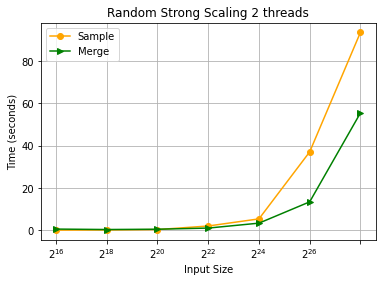

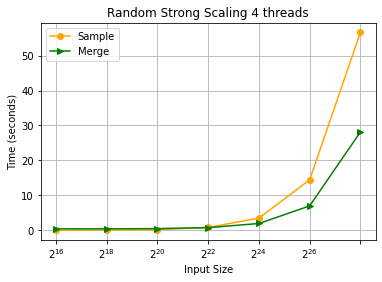

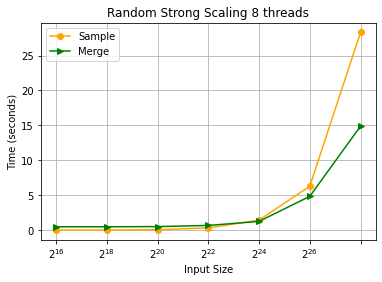

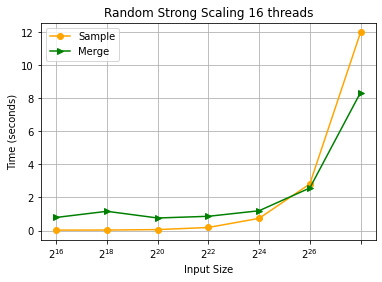

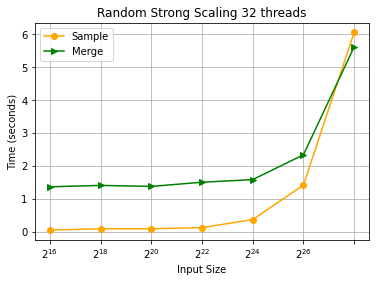

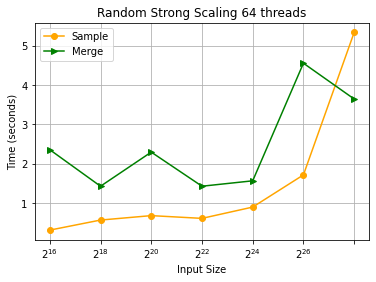

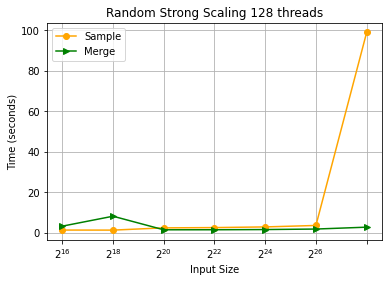

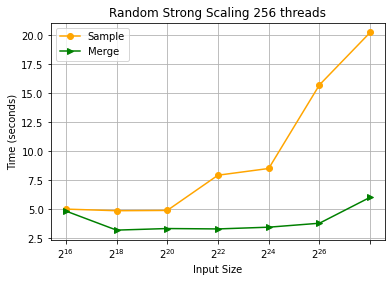

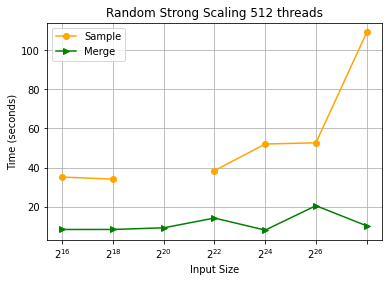

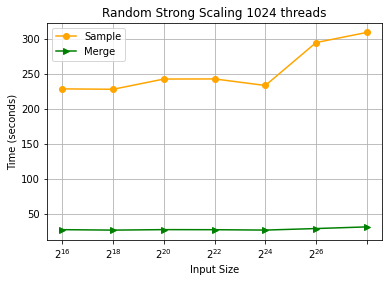

In [103]:
i = 0
for ctk in allctk:
    plot_mpl2(
        #df=ctk.dataframe[[temp[0]]].loc["main"],
        df= ctk.dataframe[[temp[1]]].loc["main"],
        df1= ctk.dataframe[[temp[2]]].loc["main"],
        title=f"Random Strong Scaling {threads[i]} threads",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        #label1='Bubble',
        label1='Sample',
        label2='Merge'
    )
    i += 1

## comp_large Graphs

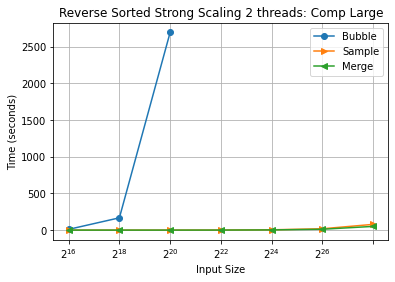

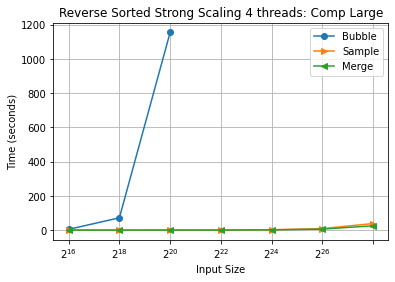

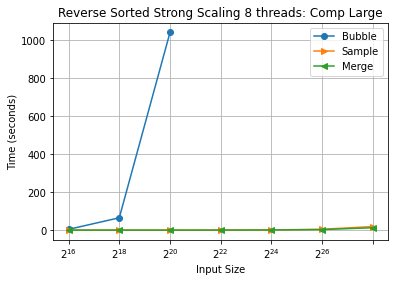

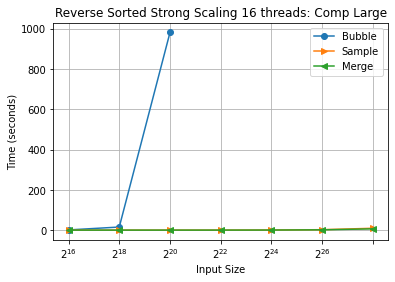

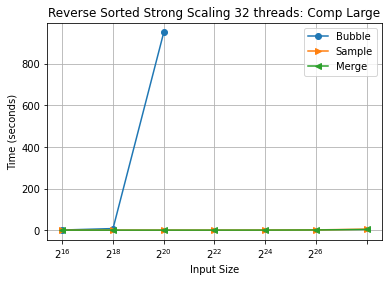

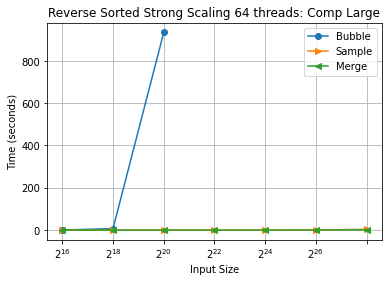

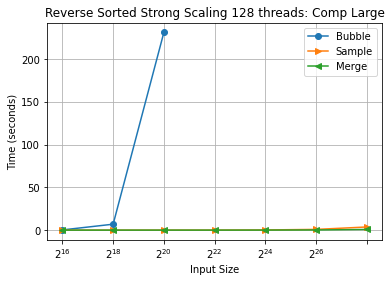

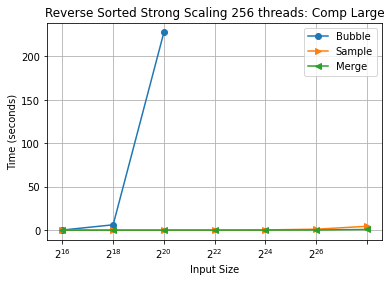

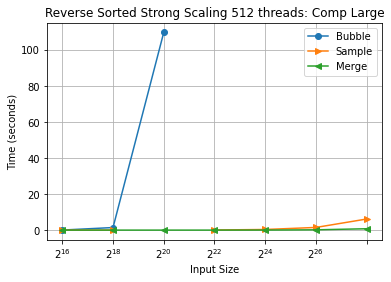

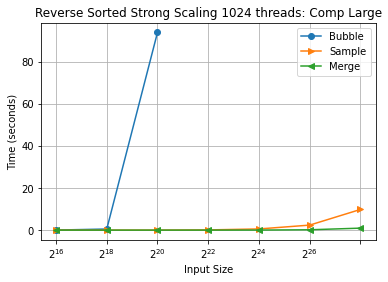

In [104]:
i = 0
for ctk in allctk:
    plot_mpl3(
        df=ctk.dataframe[[temp[0]]].loc["comp_large"],
        df1= ctk.dataframe[[temp[1]]].loc["comp_large"],
        df2= ctk.dataframe[[temp[2]]].loc["comp_large"],
        title=f"Reverse Sorted Strong Scaling {threads[i]} threads: Comp Large",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## Comm Graphs

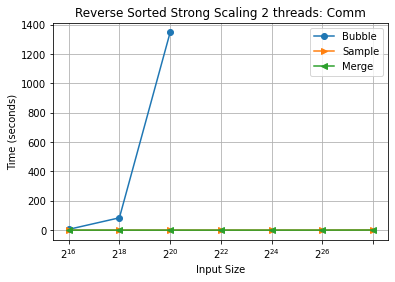

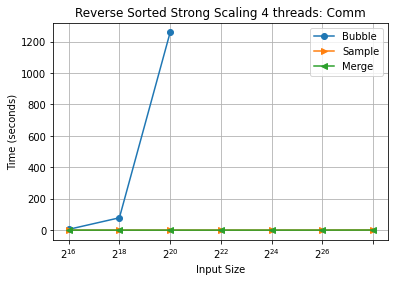

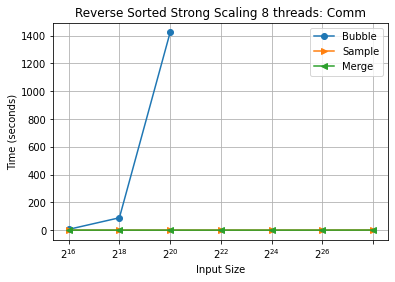

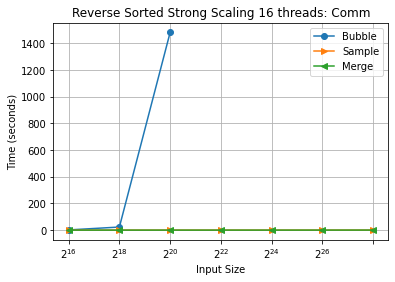

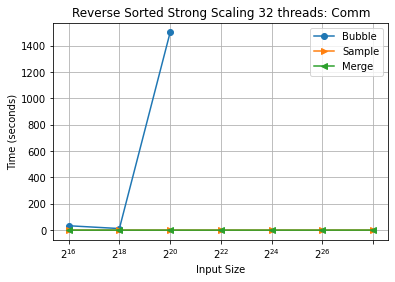

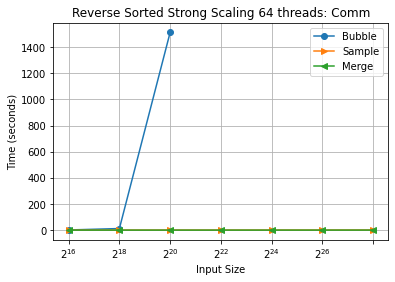

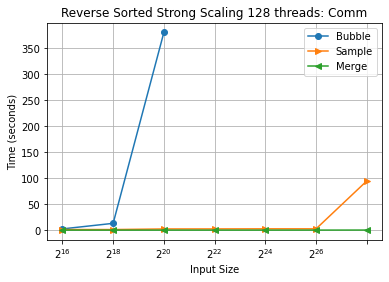

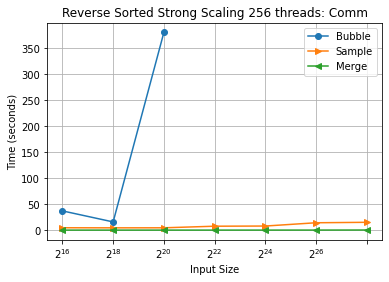

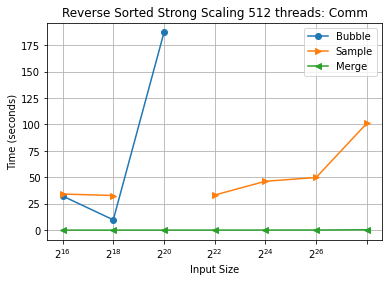

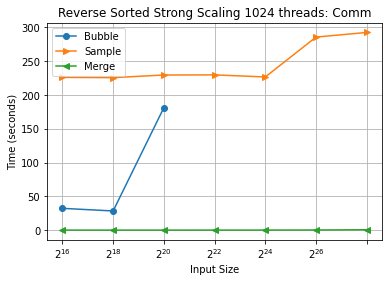

In [105]:
i = 0
for ctk in allctk:
    plot_mpl3(
        df=ctk.dataframe[[temp[0]]].loc["comm"],
        df1= ctk.dataframe[[temp[1]]].loc["comm"],
        df2= ctk.dataframe[[temp[2]]].loc["comm"],
        title=f"Reverse Sorted Strong Scaling {threads[i]} threads: Comm",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## TODO: Speedup

In [113]:

print (ctk.dataframe.loc["main"])
#speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

          Bubble Sort(Odd/Even)     MergeSort   Sample Sort
                  Avg time/rank Avg time/rank Avg time/rank
InputSize                                                  
65536                 32.279236     27.011016    228.241959
262144                28.924175     26.355617    227.681029
1048576              275.988182     27.050935    242.290877
4194304                     NaN     26.946183    242.463398
16777216                    NaN     26.403938    233.081499
67108864                    NaN     28.601502    294.430575
268435456                   NaN     30.958799    308.908532
